In [ ]:
#Description : this program attemps to optimize a users portfolio using the Efficient Frontier



In [1]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the stock symbols/ tickers in the portfolio
#FAANG 

assets = ['SOL.JO', 'LEW.JO', 'VOD.JO', 'TKG.JO', 'APN.JO', 'MCG.JO', 'STX40.JO', 'ARI.JO', 'MST.JO', 'AFT.JO', 'CSB.JO']

In [3]:
# #Get the stock symbols/ tickers in the portfolio
# #FAANG 

# assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', ]

In [4]:
#Assign weights to the stocks.
weights = np.array([0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091]) #20 percent each

In [5]:
# #Assign weights to the stocks.
# weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #20 percent each

In [6]:
#Get the stock/portfolio starting date
stockStartDate = '2012-01-01'

In [7]:
#Get the stock stocks ending date (date)
today = datetime.today().strftime('%Y-%m-%d')
today

'2022-04-17'

In [8]:
#create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into df 
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [9]:
#Show the df
df

,SOL.JO,LEW.JO,VOD.JO,TKG.JO,APN.JO,MCG.JO,STX40.JO,ARI.JO,MST.JO,AFT.JO,CSB.JO
Date,,,,,,,,,,,
2012-01-02,29026.359375,3567.043945,4872.005859,2242.778320,8951.541016,NaN,NaN,8613.100586,386.153412,318.693359,7671.386230
2012-01-03,29440.482422,3617.779541,4971.088867,2250.498535,9175.607422,NaN,2934.0,8864.944336,399.944641,324.734924,7378.833008
2012-01-04,29665.619141,3633.801025,4943.717773,2246.638184,9155.237305,NaN,2943.0,8940.498047,389.601257,320.958862,7391.184570
2012-01-05,29124.240234,3547.017334,4899.376953,2219.617188,9166.347656,NaN,2905.0,8766.726562,388.911743,317.182922,7566.065430
2012-01-06,29155.865234,3544.346680,5008.313965,2215.757080,9291.343750,NaN,2926.0,8798.962891,387.532593,317.182922,7476.351074
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-08,37138.000000,4429.000000,15373.000000,4421.000000,20091.000000,13298.0,6893.0,27838.000000,1640.000000,7300.000000,27947.000000
2022-04-11,36272.000000,4552.000000,15357.000000,4439.000000,19249.000000,13275.0,6860.0,27320.000000,1631.000000,7019.000000,28082.000000
2022-04-12,36558.000000,4600.000000,15256.000000,4414.000000,18759.000000,13190.0,6817.0,27258.000000,1640.000000,6877.000000,28323.000000


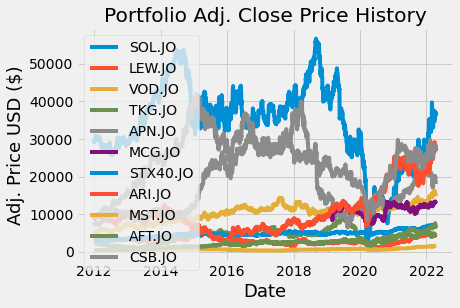

In [10]:
# visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()

In [11]:
#Show the daily simply return
returns = df.pct_change()
returns

,SOL.JO,LEW.JO,VOD.JO,TKG.JO,APN.JO,MCG.JO,STX40.JO,ARI.JO,MST.JO,AFT.JO,CSB.JO
Date,,,,,,,,,,,
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,0.014267,0.014223,0.020337,0.003442,0.025031,NaN,NaN,0.029240,0.035714,0.018957,-0.038136
2012-01-04,0.007647,0.004429,-0.005506,-0.001715,-0.002220,NaN,0.003067,0.008523,-0.025862,-0.011628,0.001674
2012-01-05,-0.018249,-0.023882,-0.008969,-0.012027,0.001214,NaN,-0.012912,-0.019436,-0.001770,-0.011765,0.023661
2012-01-06,0.001086,-0.000753,0.022235,-0.001739,0.013636,NaN,0.007229,0.003677,-0.003546,0.000000,-0.011857
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-08,0.032213,-0.003375,-0.003952,0.010283,0.007068,-0.005831,0.009520,0.031381,0.058065,0.002747,0.006229
2022-04-11,-0.023318,0.027772,-0.001041,0.004071,-0.041909,-0.001730,-0.004787,-0.018608,-0.005488,-0.038493,0.004831
2022-04-12,0.007885,0.010545,-0.006577,-0.005632,-0.025456,-0.006403,-0.006268,-0.002269,0.005518,-0.020231,0.008582


In [12]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,SOL.JO,LEW.JO,VOD.JO,TKG.JO,APN.JO,MCG.JO,STX40.JO,ARI.JO,MST.JO,AFT.JO,CSB.JO
SOL.JO,0.267445,0.018391,0.018862,0.046918,0.027348,0.028198,0.041921,0.072463,0.007273,0.011468,0.025676
LEW.JO,0.018391,0.189807,0.012651,0.019631,0.010100,0.013911,0.013339,0.020281,0.003120,0.009777,0.019046
VOD.JO,0.018862,0.012651,0.054362,0.026981,0.020316,0.031580,0.015217,0.014461,0.003086,0.002914,0.007721
TKG.JO,0.046918,0.019631,0.026981,0.172268,0.020409,0.038904,0.021070,0.030872,0.011521,0.006303,0.021994
APN.JO,0.027348,0.010100,0.020316,0.020409,0.118055,0.026182,0.020590,0.024061,0.003672,0.005306,0.010305
MCG.JO,0.028198,0.013911,0.031580,0.038904,0.026182,0.103520,0.016125,0.024195,0.005377,0.015568,0.010017
STX40.JO,0.041921,0.013339,0.015217,0.021070,0.020590,0.016125,0.031486,0.035169,0.004346,0.005954,0.011847
ARI.JO,0.072463,0.020281,0.014461,0.030872,0.024061,0.024195,0.035169,0.176195,0.010247,0.006873,0.014347
MST.JO,0.007273,0.003120,0.003086,0.011521,0.003672,0.005377,0.004346,0.010247,0.121861,0.003389,0.001293
AFT.JO,0.011468,0.009777,0.002914,0.006303,0.005306,0.015568,0.005954,0.006873,0.003389,0.118939,0.007380


In [13]:
#Create the portfol variance
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.027963046846617105

In [14]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.16722155018602447

In [15]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.16911622932635423

In [16]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str( round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100 ) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility / risk: '+ percent_vols)
print('Annual variance: '+  percent_var)

Expected annual return: 17.0%
Annual volatility / risk: 17.0%
Annual variance: 3.0%


In [24]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [17]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [18]:
#Portfolio Optimization !

#Calculate the expected returns and the annualised sample covariance matrixof asset returns
mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)


#Optimize for max sharpe ratio 
ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('SOL.JO', 0.0), ('LEW.JO', 0.0), ('VOD.JO', 0.21396), ('TKG.JO', 0.0), ('APN.JO', 0.0), ('MCG.JO', 0.0), ('STX40.JO', 0.06108), ('ARI.JO', 0.02582), ('MST.JO', 0.15468), ('AFT.JO', 0.43312), ('CSB.JO', 0.11133)])
Expected annual return: 21.7%
Annual volatility: 18.2%
Sharpe Ratio: 1.08


(0.21692349569000455, 0.18219130565946948, 1.0808611035373485)

In [19]:
#Highlight total  copy and paste and must add to 1 



In [21]:
#Prices two commos ahead eg R1089.00 = R189.00,  (10000000 = 100000)
#Get the discrete alloacation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 11501700.33)

allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: R{:.2f}'.format(leftover))

Discrete allocation: {'VOD.JO': 166, 'STX40.JO': 104, 'ARI.JO': 11, 'MST.JO': 1085, 'AFT.JO': 731, 'CSB.JO': 47}
Funds remaining: R1740.33
